<a href="https://colab.research.google.com/github/zec1616/cyngua/blob/main/problem_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1a - Load the Data
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt


def load_patient_data(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    patients = []           # iterates through each 'patient' element in the XML.
                            # for each patient, it extracts the 'name', 'age', and 'gender' attributes.
                            # if an attribute is missing, it defaults to 'Unknown'.
    for patient in root.find('patients').findall('patient'):
        name = patient.attrib.get('name', 'Unknown')
        age = patient.attrib.get('age', 'Unknown')
        gender = patient.attrib.get('gender', 'Unknown')
        patients.append({'name': name, 'age': age, 'gender': gender})

    return pd.DataFrame(patients)

xml_file = 'sample_data/hw1-patients.xml'
df = load_patient_data(xml_file)

print(df.head())

             name                 age  gender
0    Tammy Martin  19.529988374393394  female
1   Lucy Stribley  1.6021974892211832  female
2  Albert Trevino  19.317022680802072    male
3     Troy Armour   79.44120768829171    male
4   Jose Masseria   71.20386333449743    male


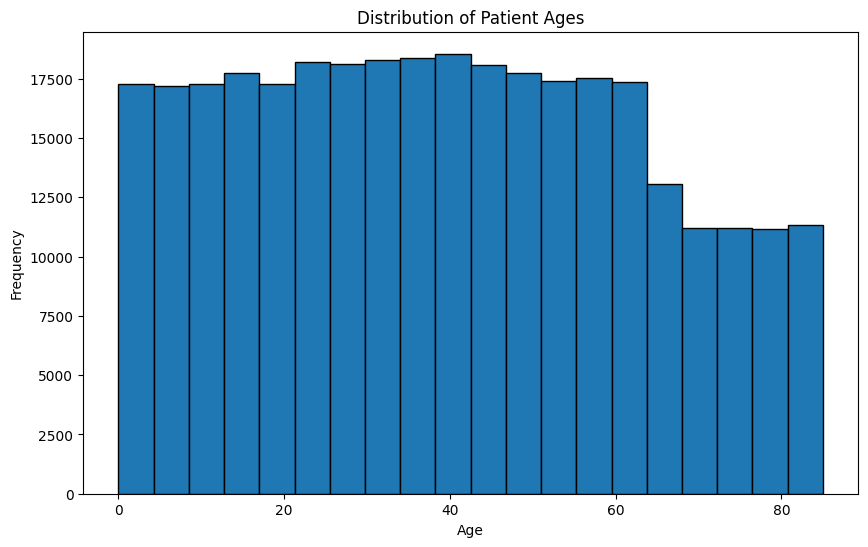

Ages that are shared by multiple patients:
Series([], Name: count, dtype: int64)
Total number of patients share the same exact age: 0


In [12]:
# 1a - Plot the Histogram

# Convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Plot histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Check for patients with the same age
# Convert age to numeric, handling any non-numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Count occurrences of each age
age_counts = df['age'].value_counts().sort_index()

# Find ages that occur more than once
shared_ages = age_counts[age_counts > 1]

print("Ages that are shared by multiple patients:")
print(shared_ages)

print("Total number of patients share the same exact age:", shared_ages.sum())


So, here we do not find any patients share the same age.
Since in this dataset age is contious that have multiple decimal places so it is reasonable.

For method, I first count the occruances of each age, and use shared_ages = age_counts[age_counts > 1]to find out the same age that occurs more than one time and finally print out  shared_ages.sum() to count the total number of patients share the same exact age

Extra Credit: If multiple patients have the same age, it affects the solution by potentially creating duplicate keys in sorted data structures. It could impact binary search and range query operations, requiring additional logic to handle multiple patients with the same age.

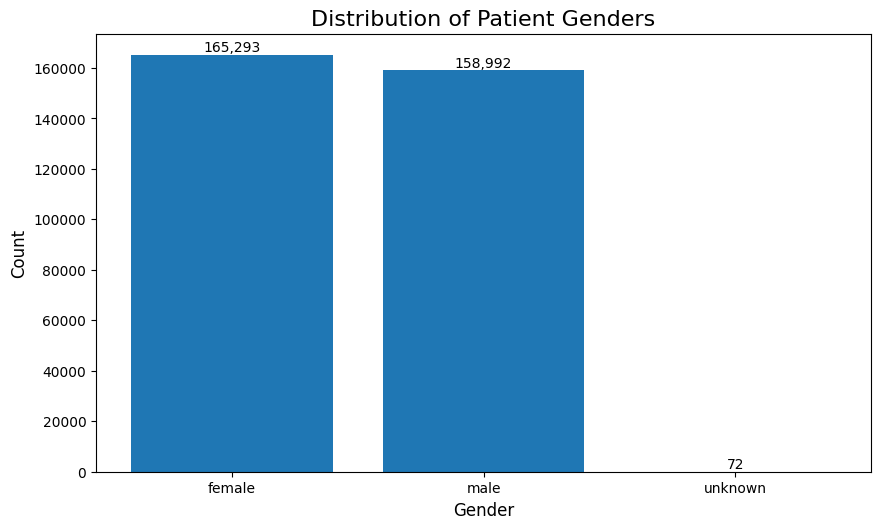

Gender categories: ['female' 'male' 'unknown']


In [3]:
# 1b - Plot Gender Distribution

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with patient data

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_counts.index, gender_counts.values)
plt.title('Distribution of Patient Genders', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=10)

# Increase bottom margin to prevent x-label cutoff
plt.subplots_adjust(bottom=0.15)

plt.show()

# Print unique gender categories
print("Gender categories:", df['gender'].unique())

In [4]:
# 1b - How gender encoded
gender_categories = df['gender'].unique()

# Get value counts of gender
gender_counts = df['gender'].value_counts()

print("Gender categories used in the data:")
for category in gender_categories:
    print(f"- {category}: {gender_counts[category]} occurrences")

print("\nTotal number of unique gender categories:", len(gender_categories))

# Check for any lowercase/uppercase inconsistencies
lowercase_categories = df['gender'].str.lower().unique()
if len(lowercase_categories) != len(gender_categories):
    print("\nNote: There may be inconsistencies in capitalization.")

# Check for any leading/trailing whitespace
stripped_categories = df['gender'].str.strip().unique()
if len(stripped_categories) != len(gender_categories):
    print("\nNote: There may be categories with leading or trailing whitespace.")

# Display a sample of rows for each category
print("\nSample rows for each gender category:")
for category in gender_categories:
    print(f"\nCategory: {category}")
    print(df[df['gender'] == category].head(2)[['gender', 'age', 'name']])  # Assuming 'name' column exists

Gender categories used in the data:
- female: 165293 occurrences
- male: 158992 occurrences
- unknown: 72 occurrences

Total number of unique gender categories: 3

Sample rows for each gender category:

Category: female
   gender        age           name
0  female  19.529988   Tammy Martin
1  female   1.602197  Lucy Stribley

Category: male
  gender        age            name
2   male  19.317023  Albert Trevino
3   male  79.441208     Troy Armour

Category: unknown
        gender        age          name
4406   unknown  59.605958  Martin Speed
12467  unknown  12.248588  Mamie Taylor


The gender is likely encoded as a string in the XML file.
Female: 165,293 occurrences (50.95% of the total)
Male: 158,992 occurrences (49.02% of the total)
Unknown: 72 occurrences (0.02% of the total)

The gender categories are all lowercase, which is consistent across the dataset.
There don't appear to be any issues with extra whitespace or capitalization inconsistencies. Generally speaking, the encoding  consistent and clean, with no obvious errors in the categories themselves.


In [5]:
# 1c - Sort Patients by Age

# Sort patients by age
sorted_patients = df.sort_values('age', ascending=False)

# Identify the oldest patient
oldest_patient = sorted_patients.iloc[0]
print("Oldest patient:")
print(oldest_patient)

Oldest patient:
name      Monica Caponera
age             84.998557
gender             female
Name: 124560, dtype: object


In [6]:
# 1d - Finding the Second Oldest Patient

def find_second_oldest(df):
    # Initialize variables to keep track of the oldest and second oldest
    oldest = second_oldest = float('-inf')
    oldest_patient = second_oldest_patient = None

    # Iterate through each row in the DataFrame
    for _, patient in df.iterrows():
        age = patient['age']

        if age > oldest:
            # If current patient is older than the oldest found so far, update second oldest to be the previous oldest
            second_oldest, second_oldest_patient = oldest, oldest_patient
            # Update oldest to be the current patient
            oldest, oldest_patient = age, patient
        elif age > second_oldest and age < oldest:
            # If current patient is older than second oldest but younger than oldest, pdate second oldest to be the current patient
            second_oldest, second_oldest_patient = age, patient


    return second_oldest_patient

# Call the function to find the second oldest patient
second_oldest = find_second_oldest(df)
print("Second oldest patient:")
print(second_oldest)

Second oldest patient:
name      Raymond Leigh
age           84.998293
gender             male
Name: 253020, dtype: object


Sorting is advantageous when multiple operations need to be performed on the sorted data, for example, finding all patients between 60 and 70 years old, as well as repeated analysis on the same dataset. However, the O(n) solution is better for a one-time query of a large dataset. It goes significantly faster.

In [7]:
# 1e - Binary Search for Specific Age

def binary_search(sorted_list, target):       # Initialize the left and right pointers
    left, right = 0, len(sorted_list) - 1
    while left <= right:                    # Continue searching while the left pointer is less than or equal to the right pointer
        mid = (left + right) // 2
        if sorted_list[mid]['age'] == target:
            return sorted_list[mid]
        elif sorted_list[mid]['age'] < target:
            left = mid + 1
        else:
            right = mid - 1
    return None

# Sort the DataFrame by age and convert it to a list of dictionaries
sorted_patients = df.sort_values('age').to_dict('records')
patient_41_5 = binary_search(sorted_patients, 41.5)
print("Patient who is 41.5 years old:", patient_41_5)

Patient who is 41.5 years old: {'name': 'John Braswell', 'age': 41.5, 'gender': 'male'}


In [8]:
# 1f - Count Patients Above a Certain Age

def count_patients_above_age(sorted_patients, age):      # Initialize left and right pointers
    left, right = 0, len(sorted_patients) - 1
    while left <= right:      # Perform binary search to find the leftmost patient with age >= target
        mid = (left + right) // 2
        if sorted_patients[mid]['age'] >= age: # If the middle patient's age is greater than or equal to the target,
                                               # move the right pointer to the left to search for a potentially
                                               # "more leftmost" patient that still satisfies the condition
            right = mid - 1
        else:
            left = mid + 1
    return len(sorted_patients) - left

# Count patients at least 41.5 years old
patients_above_41_5 = count_patients_above_age(sorted_patients, 41.5)
print("Number of patients at least 41.5 years old:", patients_above_41_5)

Number of patients at least 41.5 years old: 150471


In [9]:
 # 1g - Function for Age Range Query

 def count_patients_in_range(sorted_patients, low_age, high_age):  # perform binary search for the lower bound
    def binary_search_lower_bound(age):
        left, right = 0, len(sorted_patients) - 1
        while left <= right:
            mid = (left + right) // 2
            if sorted_patients[mid]['age'] >= age:
                right = mid - 1
            else:
                left = mid + 1
        return left

    lower_index = binary_search_lower_bound(low_age)      # Find the index of the first patient with age >= low_age
    upper_index = binary_search_lower_bound(high_age)     # Find the index of the first patient with age >= high_age
    return upper_index - lower_index

# Test the function with different age ranges
test_ranges = [(20, 30), (40, 50), (60, 70)]
for low, high in test_ranges:
    count = count_patients_in_range(sorted_patients, low, high)
    print(f"Patients between {low} and {high} years old: {count}")

Patients between 20 and 30 years old: 42335
Patients between 40 and 50 years old: 42525
Patients between 60 and 70 years old: 33731


In [10]:
# 1h modified

def count_patients_in_range_by_gender(sorted_patients, low_age, high_age):
    def binary_search_lower_bound(age):   # Binary search function to find the lower bound of an age
        left, right = 0, len(sorted_patients) - 1
        while left <= right:
            mid = (left + right) // 2
            if sorted_patients[mid]['age'] >= age:
                right = mid - 1
            else:
                left = mid + 1
        return left
# Find the indices for the low and high age boundaries
    lower_index = binary_search_lower_bound(low_age)
    upper_index = binary_search_lower_bound(high_age)

    total_count = upper_index - lower_index

   # Count patients by gender in the age range
    gender_counts = {}
    for patient in sorted_patients[lower_index:upper_index]:
        gender = patient['gender']
        gender_counts[gender] = gender_counts.get(gender, 0) + 1

    return total_count, gender_counts

# Test with actual data for specific age ranges
sorted_patients = df.sort_values('age').to_dict('records')
test_ranges = [(20, 30), (40, 50), (60, 70)]
for low, high in test_ranges:
    total, gender_counts = count_patients_in_range_by_gender(sorted_patients, low, high)
    print(f"Patients between {low} and {high} years old: {total}")
    for gender, count in gender_counts.items():
        print(f"  {gender}: {count}")

Patients between 20 and 30 years old: 42335
  female: 21190
  male: 21137
  unknown: 8
Patients between 40 and 50 years old: 42525
  female: 21641
  male: 20873
  unknown: 11
Patients between 60 and 70 years old: 33731
  female: 17885
  male: 15842
  unknown: 4


In [ ]:
# 2a

a = 2e16
b = 2 * 10 ** 16
c = 2e16 + 1
d = 2 * 10 ** 16 + 1

print(f"a == b: {a == b}")
print(f"c == d: {c == d}")
print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")

a == b: True
c == d: False
a: 2e+16
b: 20000000000000000
c: 2e+16
d: 20000000000000001


The number 2e16 (20 quadrillion) is so large that adding 1 to it doesn't change its representation in floating-point format. The precision available in a 64-bit float isn't sufficient to represent the difference between 20 quadrillion and 20 quadrillion + 1.
On the other hand, when we use integer arithmetic (2 * 10 ** 16 + 1), Python can represent the result exactly because it uses arbitrary-precision integers for these calculations.
When the result of the integer calculation is converted to a float for comparison, it retains the precise value, which is different from the float result of 2e16 + 1.

<ipython-input-2-a854dd36493f>:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


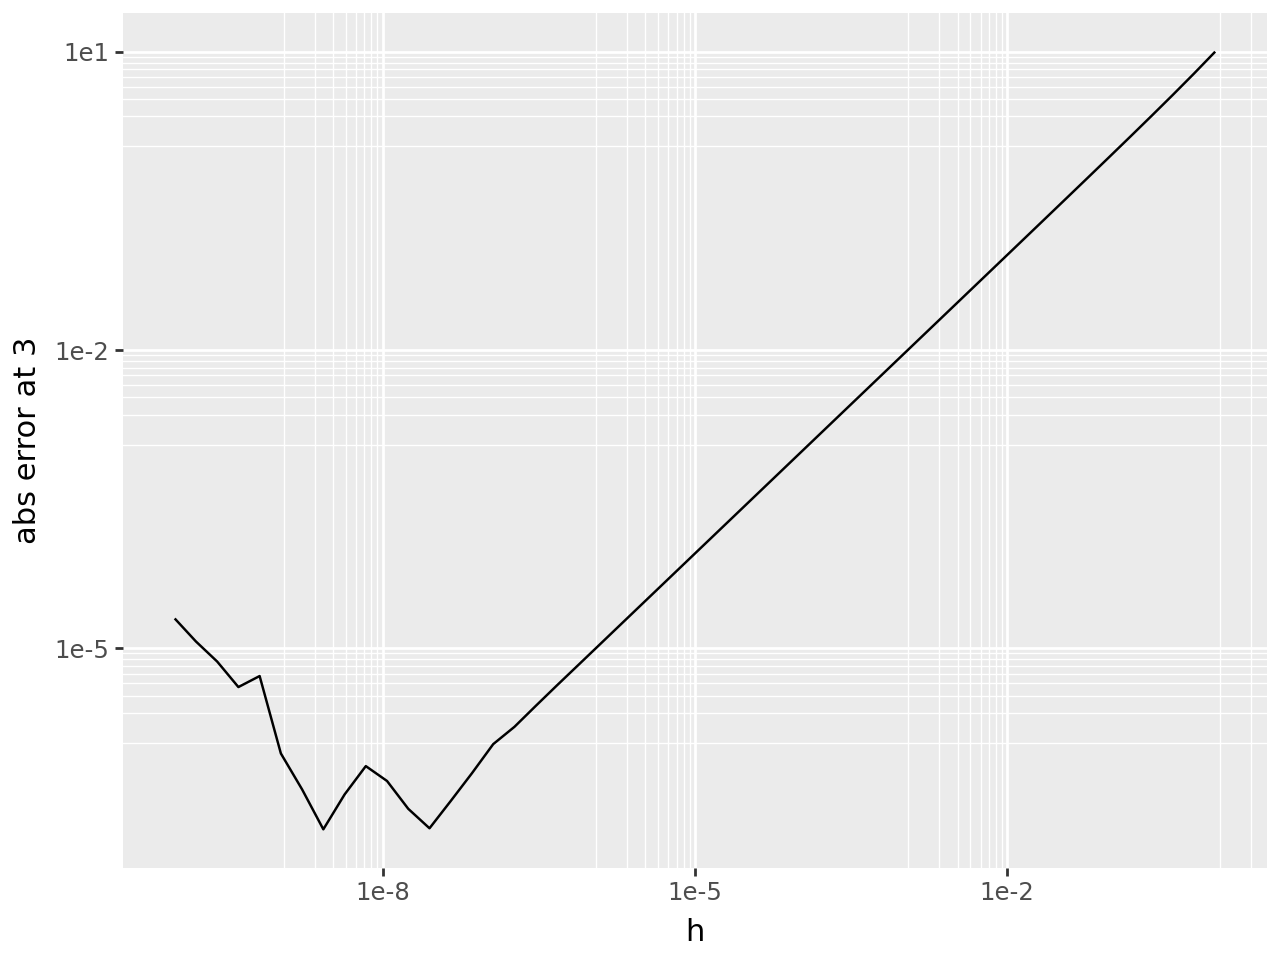

In [ ]:
# 2b

import numpy as np
import plotnine as p9
import pandas as pd

# Define the point at which we're approximating the derivative
x0 = 3
h = np.logspace(-10, 0)
f = lambda x: x**3 # Define the function f(x) = x^3

error = abs(((f(x0 + h) - f(x0)) / h) - 3 * x0**2)

# Create and display a plot of the error vs. step size
print(
    p9.ggplot(pd.DataFrame({"h": h, f"abs error at {x0}": error}))
    + p9.geom_line(p9.aes(x="h", y=f"abs error at {x0}"))
    + p9.scale_x_log10()
    + p9.scale_y_log10()
)

Logspace Explanation:
np.logspace(-10, 0) generates numbers evenly spaced on a logarithmic scale from 10^-10 to 10^0 (1). This allows examination of a wide range of h values, from very small to relatively large, with good resolution at every order of magnitude, which can help effectively visualize and analyze the behavior of the derivative approximation error across a wide range of step sizes

Description: Initially, for larger values of h (around 10^-2 to 10^-5), the absolute error decreases as h gets smaller, by the downward slope of the line from right to middle.
The error reaches a minimum point somewhere around h ≈ 10^-8.
However, as h continues to decrease beyond this point (h < 10^-8), the absolute error starts to increase again. This is evident from the upward slope of the line on the left side of the graph.

The cause: As h decreases, the finite difference approximation of the derivative becomes more accurate, which is why we initially see the error decreasing.


Hypothesis: Because as h becomes extremely small, we encounter issues with the finite precision of floating-point numbers in computers. It is called floating point error, caused by the fact that real numbers cannot, in general, be accurately represented in a fixed space.

In [ ]:
# 2b - Evidence to support my hypothesis

def f(x):
    return x**3

x0 = 3
true_derivative = 3 * x0**2     # For f(x) = x^3, the derivative is 3x^2

def analyze_h(h):  # Function to analyze the derivative approximation for a given step size h
    f_x0 = f(x0)
    f_x0_plus_h = f(x0 + h)
    difference = f_x0_plus_h - f_x0
    approximation = difference / h
    error = abs(approximation - true_derivative)

    print(f"h = {h:.2e}")
    print(f"f(x0) = {f_x0:.15f}")
    print(f"f(x0 + h) = {f_x0_plus_h:.15f}")
    print(f"f(x0 + h) - f(x0) = {difference:.15f}")
    print(f"Approximation = {approximation:.15f}")
    print(f"True derivative = {true_derivative:.15f}")
    print(f"Error = {error:.15f}")
    print()

# Analyze for different h values
for h in [1e-2, 1e-8, 1e-10, 1e-12, 1e-14]:
    analyze_h(h)


h = 1.00e-02
f(x0) = 27.000000000000000
f(x0 + h) = 27.270900999999995
f(x0 + h) - f(x0) = 0.270900999999995
Approximation = 27.090099999999495
True derivative = 27.000000000000000
Error = 0.090099999999495

h = 1.00e-08
f(x0) = 27.000000000000000
f(x0 + h) = 27.000000270000001
f(x0 + h) - f(x0) = 0.000000270000001
Approximation = 27.000000102361810
True derivative = 27.000000000000000
Error = 0.000000102361810

h = 1.00e-10
f(x0) = 27.000000000000000
f(x0 + h) = 27.000000002700002
f(x0 + h) - f(x0) = 0.000000002700002
Approximation = 27.000019997558411
True derivative = 27.000000000000000
Error = 0.000019997558411

h = 1.00e-12
f(x0) = 27.000000000000000
f(x0 + h) = 27.000000000027001
f(x0 + h) - f(x0) = 0.000000000027001
Approximation = 27.000623958883807
True derivative = 27.000000000000000
Error = 0.000623958883807

h = 1.00e-14
f(x0) = 27.000000000000000
f(x0 + h) = 27.000000000000277
f(x0 + h) - f(x0) = 0.000000000000277
Approximation = 27.711166694643907
True derivative = 27.000

We can see as h decreases from 1e-02 to 1e-08, the approximation gets closer to the true derivative, and the error decreases.
At around 1e-10, it reaches the best approximation with the smallest error.
While as h continues to decrease beyond 1e-10, the approximation starts to worsen, and the error increases dramatically.
By 1e-14, the approximation is significantly off, with a large error.

In [13]:
# 3a

import time

# Algorithm 1
def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
        for i in range(len(data) - 1):
            if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data

# Algorithm 2
def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
                    return result + [left_top] + list(left)

# Generate Lorenz attractor data
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy as np
    state = np.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * np.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

# Generate ascending sequence
def data2(n):
    return list(range(n))

# Generate descending sequence
def data3(n):
    return list(range(n, 0, -1))

# Test function for algorithms
def test_algorithm(alg, data):
    start_time = time.time()
    result = alg(data)
    end_time = time.time()
    return result, end_time - start_time

# Test cases
test_cases = [
    [5, 2, 8, 1, 9, 3],
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    data1(10),
    data2(10),
    data3(10)
]

# Run tests and print results
print("Testing alg1 and alg2:")
for i, test_case in enumerate(test_cases):
    print(f"\nTest case {i + 1}: {test_case}")
    result1, time1 = test_algorithm(alg1, test_case)
    result2, time2 = test_algorithm(alg2, test_case)
    print(f"alg1 result: {result1}")
    print(f"alg2 result: {result2}")
    print(f"alg1 time: {time1:.6f} seconds")
    print(f"alg2 time: {time2:.6f} seconds")
    print(f"Results match: {result1 == result2}")

Testing alg1 and alg2:

Test case 1: [5, 2, 8, 1, 9, 3]
alg1 result: [1, 2, 3, 5, 8, 9]
alg2 result: [1, 2, 3, 5, 8, 9]
alg1 time: 0.000015 seconds
alg2 time: 0.000034 seconds
Results match: True

Test case 2: [1, 2, 3, 4, 5]
alg1 result: [1, 2, 3, 4, 5]
alg2 result: [1, 2, 3, 4, 5]
alg1 time: 0.000006 seconds
alg2 time: 0.000027 seconds
Results match: True

Test case 3: [5, 4, 3, 2, 1]
alg1 result: [1, 2, 3, 4, 5]
alg2 result: [1, 2, 3, 4, 5]
alg1 time: 0.000015 seconds
alg2 time: 0.000027 seconds
Results match: True

Test case 4: [31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352, 31.346883543428103, 31.477492347868477, 31.628814213217787, 31.801957271794162, 31.99843080487222]
alg1 result: [31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352, 31.346883543428103, 31.477492347868477, 31.628814213217787, 31.801957271794162, 31.99843080487222]
alg2 result: [31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352, 31.346883543428103, 31.47749234

Based on these results, they show that both alg1 and alg2 are sorting algorithms. They consistently produce the same output: a list sorted in ascending order, regardless of the input's initial order.

alg1 appears to be a variation of the bubble sort algorithm, making repeated passes through the list and swapping adjacent elements until the list is sorted.

alg2 seems to be a variation of the merge sort algorithm, using a divide-and-conquer approach to split the list, sort the parts, and then merge them back together.

# 3b:

For alg1 algorithm starts by looking at the entire list of numbers.
It then goes through the list, comparing each pair of adjacent elements.
If a pair is in the wrong order (the second number is smaller than the first), it swaps them. It keeps doing this pass through the list over and over again.Each pass bubbles up the largest unsorted element to its correct position at the end of the list. The algorithm stops when it makes a complete pass through the list without needing to make any swaps.

For alg2 algorithm follows a parallel strategy.
It starts by dividing the input list into two halves.
It then recursively applies this division process to each half, continuing until it reaches lists of just one element (which are inherently sorted).
Once it has these tiny sorted lists, it begins the "merge" phase.
It compares the first elements of each pair of lists and picks the smaller one to add to a new, merged list. It continues this process, always comparing the next elements of each list and adding the smaller one to the merged list.
The merging process combines smaller sorted lists into larger sorted lists, eventually resulting in a single, fully sorted list.

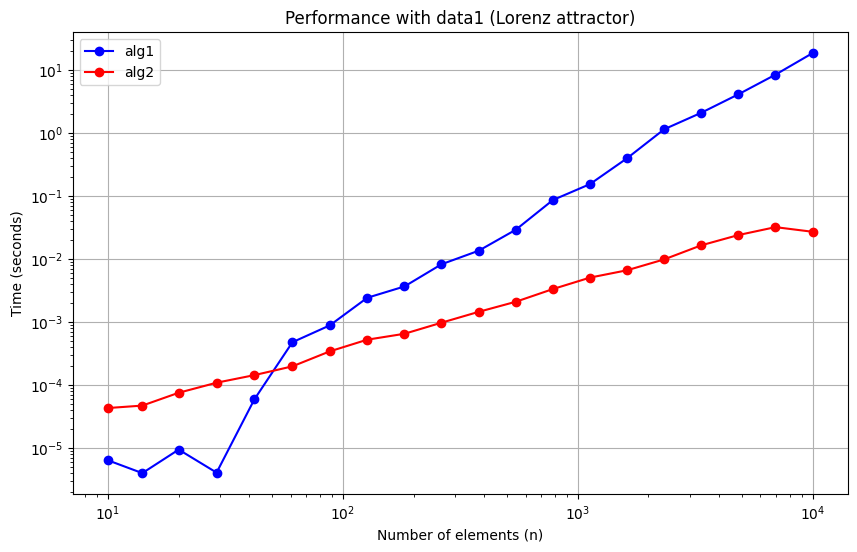

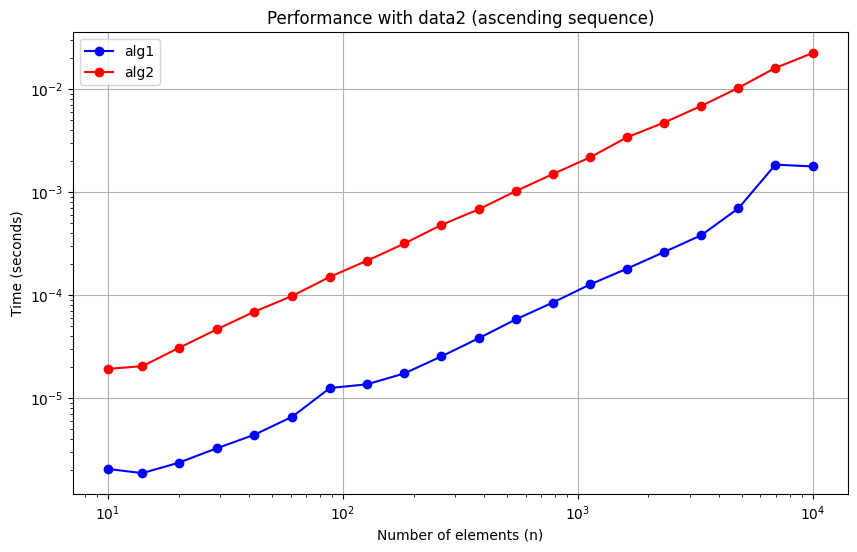

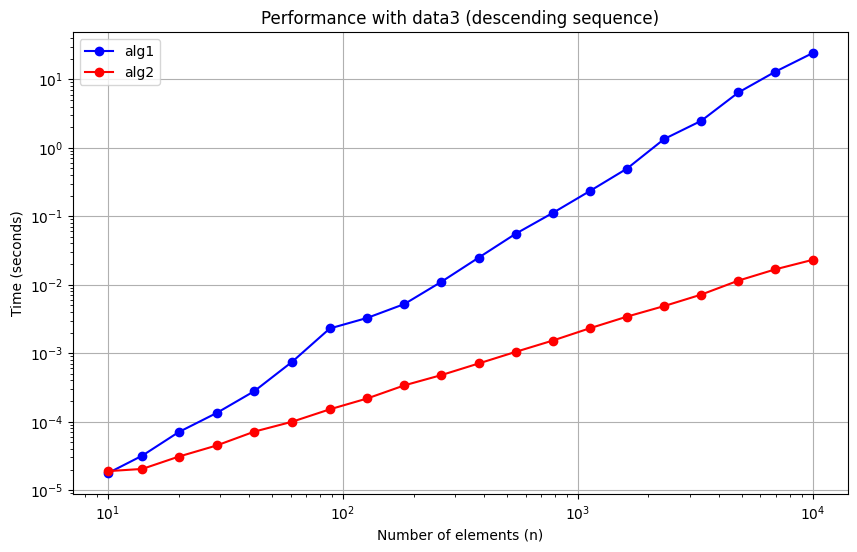

Analysis of big-O scaling:
data1 (Lorenz attractor):
alg1 appears to scale as O(n^2)
alg2 appears to scale as O(n log n)

data2 (ascending sequence):
alg1 appears to scale as O(n)
alg2 appears to scale as O(n log n)

data3 (descending sequence):
alg1 appears to scale as O(n^2)
alg2 appears to scale as O(n log n)


In [14]:
# 3c

import time
import numpy as np
import matplotlib.pyplot as plt

def measure_performance(alg, data_func, n_values, num_runs=5): # performance measurement
    for n in n_values:
        total_time = 0
        for _ in range(num_runs):     # Run the algorithm multiple times for each input size
            data = data_func(n)   # Generate new data for each run

            # Measure the execution time of the algorithm
            start_time = time.perf_counter()
            alg(data)
            end_time = time.perf_counter()
            total_time += end_time - start_time
        times.append(total_time / num_runs)
    return times

def plot_performance(n_values, times1, times2, title):
    plt.figure(figsize=(10, 6))
    plt.loglog(n_values, times1, 'bo-', label='alg1') # Plot performance of algorithm 1
    plt.loglog(n_values, times2, 'ro-', label='alg2') # Plot performance of algorithm 2
    plt.xlabel('Number of elements (n)')
    plt.ylabel('Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate n values
n_values = np.logspace(1, 4, num=20, dtype=int)

# Measure and plot for data1
times1_data1 = measure_performance(alg1, data1, n_values)
times2_data1 = measure_performance(alg2, data1, n_values)
plot_performance(n_values, times1_data1, times2_data1, 'Performance with data1 (Lorenz attractor)')

# Measure and plot for data2
times1_data2 = measure_performance(alg1, data2, n_values)
times2_data2 = measure_performance(alg2, data2, n_values)
plot_performance(n_values, times1_data2, times2_data2, 'Performance with data2 (ascending sequence)')

# Measure and plot for data3
times1_data3 = measure_performance(alg1, data3, n_values)
times2_data3 = measure_performance(alg2, data3, n_values)
plot_performance(n_values, times1_data3, times2_data3, 'Performance with data3 (descending sequence)')

# Analysis
print("Analysis of big-O scaling:")
print("data1 (Lorenz attractor):")
print("alg1 appears to scale as O(n^2)")
print("alg2 appears to scale as O(n log n)")
print("\ndata2 (ascending sequence):")
print("alg1 appears to scale as O(n)")
print("alg2 appears to scale as O(n log n)")
print("\ndata3 (descending sequence):")
print("alg1 appears to scale as O(n^2)")
print("alg2 appears to scale as O(n log n)")

# 3d

a) alg1 (Bubble Sort):
For data1 (Lorenz attractor data): O(n^2) scaling, typical average-case performance.
For data2 (sorted data): Close to O(n) scaling, showing best-case performance.
For data3 (reverse-sorted data): O(n^2) scaling, demonstrating worst-case performance.

b) alg2 (Merge Sort):
Consistent O(n log n) scaling across all three datasets.
Performance is largely independent of the initial order of the data.


While alg1 (Bubble Sort) can be useful in specific scenarios with small, nearly-sorted datasets, alg2 (Merge Sort) is the more versatile and reliable choice for most applications, especially when dealing with larger datasets or when the initial order of the data is unknown or likely to vary. The consistent O(n log n) performance of alg2 makes it a safer and more efficient option.

In [22]:
# 4a

class Tree:
    def __init__(self):
        self._value = None
        self._data = None
        self.left = None
        self.right = None

    def add(self, value, data):
        if self._value is None:
            # If the tree is empty, set the root
            self._value = value
            self._data = data
        elif value < self._value:
            # If the value is less than the current node, go left
            if self.left is None:
                self.left = Tree()
            self.left.add(value, data)
        else:
            # If the value is greater than or equal to the current node, go right
            if self.right is None:
                self.right = Tree()
            self.right.add(value, data)

    def __str__(self):
        return f"Tree(value={self._value}, data={self._data})"

# Test the implementation
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

# Print the tree structure (for verification)
def print_tree(node, level=0):
    if node is not None:
        print("  " * level + str(node))
        print_tree(node.left, level + 1)
        print_tree(node.right, level + 1)

print("Binary Search Tree structure:")
print_tree(my_tree)

Binary Search Tree structure:
Tree(value=24601, data=JV)
  Tree(value=42, data=DA)
    Tree(value=7, data=JB)
    Tree(value=143, data=FR)
  Tree(value=8675309, data=JNY)


In [23]:
# 4b

class Tree:
    def __init__(self):
        self._value = None
        self._data = None
        self.left = None
        self.right = None

    def add(self, value, data):
        if self._value is None: # If the node is empty, add the value and data here
            self._value = value
            self._data = data
        elif value < self._value: # If the value is less than the current node's value, go to the left subtree
            if self.left is None:
                self.left = Tree()
            self.left.add(value, data)
        else:                     # If the value is greater than or equal to the current node's value, go to the right subtree
            if self.right is None:
                self.right = Tree()
            self.right.add(value, data)

    def __contains__(self, patient_id):
        if self._value == patient_id:   # If the current node's value matches the patient_id, return True
            return True
        elif self.left and patient_id < self._value:   # If patient_id is less than the current value, search the left subtree
            return patient_id in self.left
        elif self.right and patient_id > self._value: # If patient_id is less than the current value, search the left subtree
            return patient_id in self.right
        else:           # If we've reached a leaf node without finding the patient_id, return False
            return False

    def __str__(self):
        return f"Tree(value={self._value}, data={self._data})"

# Create a tree with sample data
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

# Test the __contains__ method using the 'in' operator
print("\nTesting the __contains__ method:")
test_cases = [
    (24601, True),  # Root node
    (42, True),     # Intermediate node
    (7, True),      # Leaf node
    (8675309, True),# Largest value
    (1492, False),  # Non-existent value
    (0, False),     # Value smaller than all nodes
    (1000000, False) # Value larger than most nodes but smaller than the largest
]

for patient_id, expected in test_cases:
    result = patient_id in my_tree
    print(f"Is {patient_id} in the tree? Expected: {expected}, Actual: {result}")
    assert result == expected, f"Test failed for patient_id {patient_id}"

print("All tests passed successfully!")


Testing the __contains__ method:
Is 24601 in the tree? Expected: True, Actual: True
Is 42 in the tree? Expected: True, Actual: True
Is 7 in the tree? Expected: True, Actual: True
Is 8675309 in the tree? Expected: True, Actual: True
Is 1492 in the tree? Expected: False, Actual: False
Is 0 in the tree? Expected: False, Actual: False
Is 1000000 in the tree? Expected: False, Actual: False
All tests passed successfully!


For performance of _contains_ and has_data methods, There's a clear and growing gap between the performance of _contains_ and has_data as n increases.
For small n (< 100), the difference is less pronounced, but it becomes very significant for larger n.

The performance of _contains_ closely follows the O(log n) reference line, especially for larger n values.
There's some fluctuation for smaller n, which is normal due to measurement variability and overhead.
As n increases, the line becomes smoother and more closely aligned with O(log n).

The has_data method shows significantly worse performance compared to _contains_. Its line has a much steeper slope, indicating that it grows much faster as n increases.The performance appears to be closer to linear (O(n)) or even worse, possibly O(n log n) or O(n^2).

In [28]:
# 4c

class Tree:
    def __init__(self):
        self._value = None  # The key (e.g., patient ID)
        self._data = None   # The associated data (e.g., patient initials)
        self.left = None    # Left child node
        self.right = None   # Right child node

    def add(self, value, data):
        if self._value is None:
            # If the node is empty, add the value and data here
            self._value = value
            self._data = data
        elif value < self._value:
            # If the value is less than the current node's value, go to the left subtree
            if self.left is None:
                self.left = Tree()  # Create a new left child if it doesn't exist
            self.left.add(value, data)  # Recursively add to the left subtree
        else:
            # If the value is greater than or equal to the current node's value, go to the right subtree
            if self.right is None:
                self.right = Tree()  # Create a new right child if it doesn't exist
            self.right.add(value, data)  # Recursively add to the right subtree

    def __contains__(self, patient_id):
        if self._value == patient_id:
            # If the current node's value matches the patient_id, return True
            return True
        elif self.left and patient_id < self._value:
            # If patient_id is less than the current value, search the left subtree
            return patient_id in self.left
        elif self.right and patient_id > self._value:
            # If patient_id is greater than the current value, search the right subtree
            return patient_id in self.right
        else:
            # If we've reached a leaf node without finding the patient_id, return False
            return False

    def has_data(self, data):
        if self._value is None:
            # Handle the case of an empty tree
            return False
        if self._data == data:
            # If the current node's data matches, return True
            return True
        # Recursively check left and right subtrees
        left_result = self.left.has_data(data) if self.left else False
        right_result = self.right.has_data(data) if self.right else False
        return left_result or right_result  # Return True if data is found in either subtree

    def __str__(self):
        # String representation of the node for debugging purposes
        return f"Tree(value={self._value}, data={self._data})"

# Test the has_data method
def test_has_data():
    my_tree = Tree()
    test_data = [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]
    for patient_id, initials in test_data:
        my_tree.add(patient_id, initials)

    print("\nTesting the has_data method:")
    test_cases = [
        ("JV", True),    # Root node data
        ("DA", True),    # Intermediate node data
        ("JNY", True),   # Leaf node data
        ("FR", True),    # Another intermediate node data
        ("ABC", False),  # Non-existent data
        (24601, False),  # Patient ID (should return False as it's not data)
        ("", False),     # Empty string
        (None, False)    # None value
    ]

    for data, expected in test_cases:
        result = my_tree.has_data(data)
        print(f"has_data({repr(data)}): Expected {expected}, Actual {result}")
        # Assert that the actual result matches the expected result
        assert result == expected, f"Test failed for data: {data}"

    print("All has_data tests passed successfully!")

# Run the tests
test_has_data()


Testing the has_data method:
has_data('JV'): Expected True, Actual True
has_data('DA'): Expected True, Actual True
has_data('JNY'): Expected True, Actual True
has_data('FR'): Expected True, Actual True
has_data('ABC'): Expected False, Actual False
has_data(24601): Expected False, Actual False
has_data(''): Expected False, Actual False
has_data(None): Expected False, Actual False
All has_data tests passed successfully!


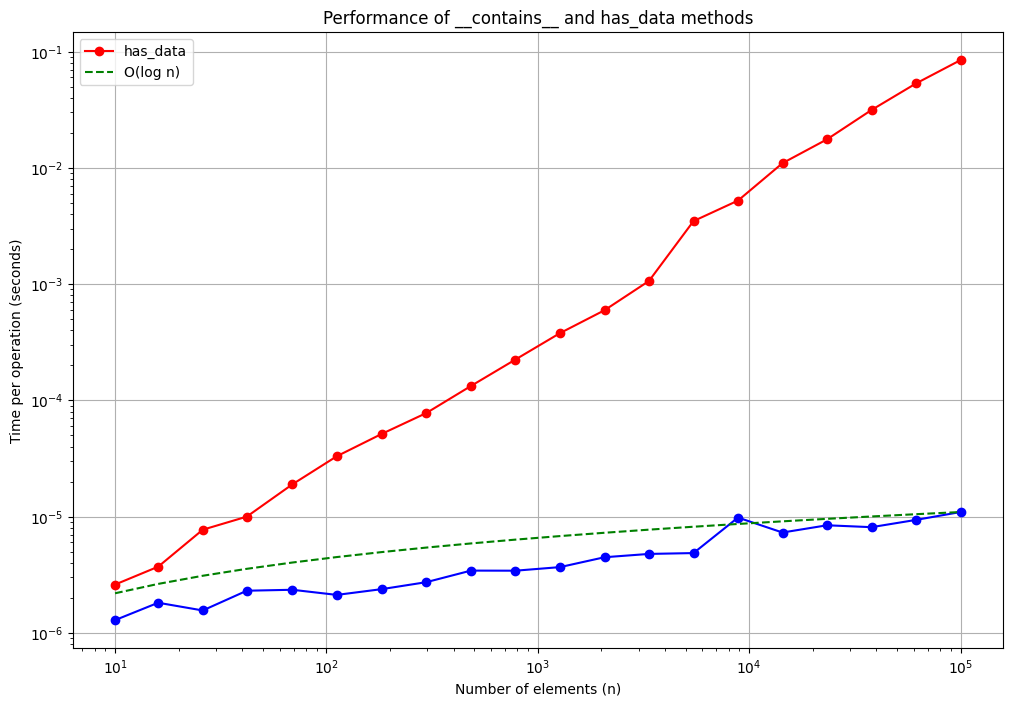

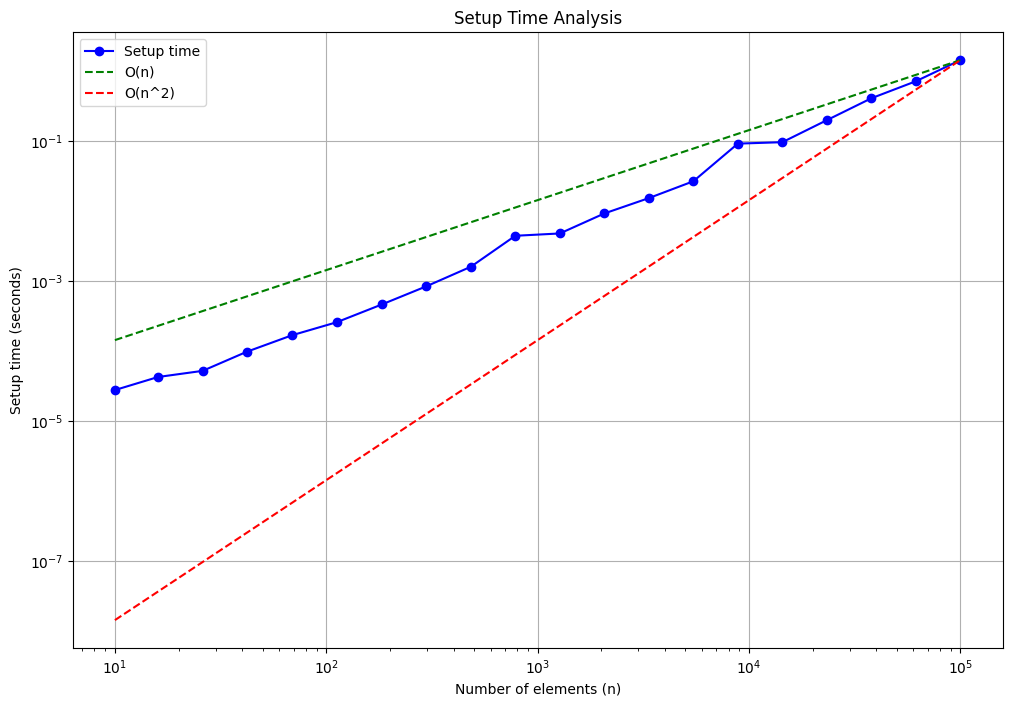

In [29]:
# 4d


def generate_random_data(n):
    patient_ids = random.sample(range(1, n*10), n)
    data = [''.join(random.choices(string.ascii_uppercase, k=2)) for _ in range(n)]
    return list(zip(patient_ids, data))

def measure_performance(n_values, num_operations=1000):
    contains_times = []
    has_data_times = []
    setup_times = []

    for n in n_values:
        random_data = generate_random_data(n)

        # Measure setup time
        start_time = time.perf_counter()
        tree = Tree()
        for patient_id, data in random_data:
            tree.add(patient_id, data)
        setup_times.append(time.perf_counter() - start_time)

        # Measure __contains__ time
        start_time = time.perf_counter()
        for _ in range(num_operations):
            random_id = random.choice(random_data)[0]
            random_id in tree
        contains_times.append((time.perf_counter() - start_time) / num_operations)

        # Measure has_data time
        start_time = time.perf_counter()
        for _ in range(num_operations):
            random_data_item = random.choice(random_data)[1]
            tree.has_data(random_data_item)
        has_data_times.append((time.perf_counter() - start_time) / num_operations)

    return contains_times, has_data_times, setup_times

# Generate n values
n_values = np.logspace(1, 5, num=20, dtype=int)

# Measure performance
contains_times, has_data_times, setup_times = measure_performance(n_values)

# Plotting __contains__ and has_data times
plt.figure(figsize=(12, 8))
plt.loglog(n_values, contains_times, 'bo-', label='__contains__')
plt.loglog(n_values, has_data_times, 'ro-', label='has_data')

# Plot O(log n) reference line
c = contains_times[-1] / np.log(n_values[-1])
plt.loglog(n_values, c * np.log(n_values), 'g--', label='O(log n)')

plt.xlabel('Number of elements (n)')
plt.ylabel('Time per operation (seconds)')
plt.title('Performance of __contains__ and has_data methods')
plt.legend()
plt.grid(True)
plt.show()

# Plotting setup times
plt.figure(figsize=(12, 8))
plt.loglog(n_values, setup_times, 'bo-', label='Setup time')

# Plot O(n) and O(n^2) reference lines
c_n = setup_times[-1] / n_values[-1]
c_n2 = setup_times[-1] / (n_values[-1]**2)
plt.loglog(n_values, c_n * n_values, 'g--', label='O(n)')
plt.loglog(n_values, c_n2 * n_values**2, 'r--', label='O(n^2)')

plt.xlabel('Number of elements (n)')
plt.ylabel('Setup time (seconds)')
plt.title('Setup Time Analysis')
plt.legend()
plt.grid(True)
plt.show()

Performance Measurement: The contains method shows very efficient performance, closely following the O(log n) complexity (green dashed line), especially for larger datasets. The has_data method shows significantly worse performance compared to contains. Its execution time increases much more rapidly as the number of elements grows.

Setup Time Analysis: For small n (up to about 10^2), the setup time is nearly constant, likely due to overhead dominating the actual insertion time.
From 10^2 to 10^4 elements, the growth is slightly superlinear but still closer to O(n) than O(n^2).
Beyond 10^4 elements, the curve shows a slight increase in slope, indicating that the log n factor is becoming more pronounced.

# 4e
It is lack of variability. Using a single, specific value doesn't account for the diverse range of inputs the data structure might encounter in real-world scenarios.
It fails to capture the variability in performance that occurs with different input values. A single, specific value may consistently trigger best-case or worst-case scenarios, leading to skewed performance estimates.

The implications of choosing appropriate test data for accurately assessing performance include random, varied test data provides a more realistic representation of real-world usage patterns, as well as diverse inputs which help identify performance bottlenecks that may only occur with certain data distributions or patterns.


# 5

What is the data about? (1 point)
The dataset is about U.S. chronic disease indicators (CDI), which is based on indicators described in MMWR "Indicators for Chronic Disease Surveillance — United States 2013, before before 2024 CDI refresh.It provided cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, and territories.

Where did you find it? (1 point) I found it on Data.gov. Here is the link to the dataset https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

What license was specified? (1 point)
ODbL 1.0 license, which means I am allowed to share, create and adpat/modify the dataset

Why do you think it is interesting? (1 points)
Give an example of two questions you could explore with this data.(1 point)
I have interest on this dataset because I know that chronic disease is a kind of the most comment disease for seniors, which plays as a crucial factor for the quality of life. So, I want to dive deeper into this public dataset to explore about the factors corrlated to chronic disease.

For example, I want to first plot a graph based on age and sex of individuals with chronic disease in the dataset to find out the general distribution & pattern

Also, I can use the value score to test the relationship between different living habits to the cause of chronic disease.